### Installing dependencies and notebook gpu setup

Importing dependencies for the project

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10

%matplotlib inline
tf.__version__

'2.4.1'

# Dataset preprocessing

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [ ]:
X_train = X_train / 255.0

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test = X_test / 255.0

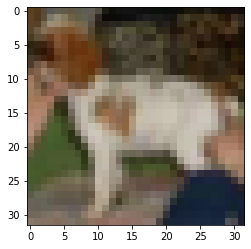

In [ ]:
plt.imshow(X_test[12])

### **Building a Convolutional neural network**

In [ ]:
model = tf.keras.models.Sequential()

### Adding the first CNN Layer

CNN layer hyper-parameters:
- filters: 32
- kernel_size:3
- padding: same
- activation: relu
- input_shape: (32, 32, 3)







---



---



In [ ]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]))

### Adding the second CNN Layer and max pool layer

CNN layer hyper-parameters:
- filters: 32
- kernel_size:3
- padding: same
- activation: relu

MaxPool layer hyper-parameters:
- pool_size: 2
- strides: 2
- padding: valid


In [ ]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))

In [ ]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

### Adding the third CNN Layer

CNN layer hyper-parameters:

  

1.   kernel_size:3
2.   padding: same
3.   activation: relu
4.   input_shape: (32, 32, 3)
5.     filters: 64







   


In [ ]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

In [ ]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

In [ ]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [ ]:
model.add(tf.keras.layers.Flatten())

In [ ]:
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [ ]:
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam", metrics=["sparse_categorical_accuracy"])

In [ ]:
model.fit(X_train, y_train, epochs=6)

Epoch 1/6
1563/1563 [==============================] - 40s 4ms/step - loss: 1.5980 - sparse_categorical_accuracy: 0.4149
Epoch 2/6
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9224 - sparse_categorical_accuracy: 0.6776
Epoch 3/6
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7031 - sparse_categorical_accuracy: 0.7545
Epoch 4/6
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5632 - sparse_categorical_accuracy: 0.8016
Epoch 5/6
1563/1563 [==============================] - 7s 4ms/step - loss: 0.4536 - sparse_categorical_accuracy: 0.8390
Epoch 6/6
1563/1563 [==============================] - 7s 4ms/step - loss: 0.3375 - sparse_categorical_accuracy: 0.8800


In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.8312 - sparse_categorical_accuracy: 0.7405


In [ ]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.7404999732971191
